# Exploring high dimensional data


## Finding the number of dimensions in a dataset
A larger sample of the Pokemon dataset has been loaded for you as the Pandas dataframe pokemon_df.

How many dimensions, or columns are in this dataset?

### init: 1 dataframe

In [1]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(pokemon_df)
tobedownloaded=" {pandas.core.frame.DataFrame: {'pokemon_df.csv': 'https://file.io/ufRnVb'}}"
prefix='data_from_datacamp/Chap111_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

 {pandas.core.frame.DataFrame: {"pokemon_df.csv": "https://file.io/ufRnVb"}}
{'pandas.core.frame.DataFrame': {'pokemon_df.csv': 'https://file.io/ufRnVb'}}


D:\git\data-scientist-skills\python-sandbox\dimensionality-reduction-in-python\uploadfromdatacamp.py:92: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dict_urls=yaml.load(dict_urls)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5906    0  5906    0     0  10061      0 --:--:-- --:--:-- --:--:-- 10061


In [3]:
import pandas as pd
pokemon_df=pd.read_csv(prefix+'pokemon_df.csv',index_col=0)

### code

In [4]:
pokemon_df.shape

(160, 7)

## Removing features without variance
A sample of the Pokemon dataset has been loaded as pokemon_df. To get an idea of which features have little variance you should use the IPython Shell to calculate summary statistics on this sample. Then adjust the code to create a smaller, easier to understand, dataset.

In [5]:
pokemon_df.describe()

,HP,Attack,Defense,Generation
count,160.00000,160.00000,160.000000,160.0
mean,64.61250,74.98125,70.175000,1.0
std,27.92127,29.18009,28.883533,0.0
min,10.00000,5.00000,5.000000,1.0
25%,45.00000,52.00000,50.000000,1.0
50%,60.00000,71.00000,65.000000,1.0
75%,80.00000,95.00000,85.000000,1.0
max,250.00000,155.00000,180.000000,1.0


In [6]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense']

In [8]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense']

# Leave this list as is for now
non_number_cols = ['Name', 'Type', 'Legendary']

# Sub-select by combining the lists with chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name   Type  Legendary
0  45      49       49              Bulbasaur  Grass      False
1  60      62       63                Ivysaur  Grass      False
2  80      82       83               Venusaur  Grass      False
3  80     100      123  VenusaurMega Venusaur  Grass      False
4  39      52       43             Charmander   Fire      False


Find the non-numeric feature without variance and remove its name from the list assigned to non_number_cols.


In [16]:
#export
#un describre pour les colonnes non numeriques
pokemon_df.describe(exclude='number')

,Name,Type,Legendary
count,160,160,160
unique,160,15,1
top,Caterpie,Water,False
freq,1,31,160


In [17]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name   Type
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


# Feature selection vs feature extraction
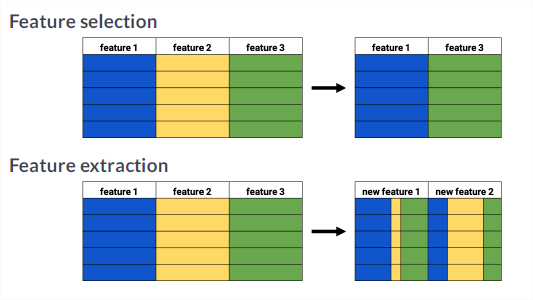

## Visually detecting redundant features
Data visualization is a crucial step in any data exploration. Let's use Seaborn to explore some samples of the US Army ANSUR body measurement dataset.

Two data samples have been pre-loaded as ansur_df_1 and ansur_df_2.

Seaborn has been imported as sns.

### init: 2 dataframe, seaborn

In [19]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(ansur_df_1,ansur_df_2)
tobedownloaded="{pandas.core.frame.DataFrame: {'ansur_df_1.csv': 'https://file.io/0bTNuE',  'ansur_df_2.csv': 'https://file.io/ppDroI'}}"
prefix='data_from_datacamp/Chap121_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"ansur_df_1.csv": "https://file.io/0bTNuE",  "ansur_df_2.csv": "https://file.io/ppDroI"}}
{'pandas.core.frame.DataFrame': {'ansur_df_1.csv': 'https://file.io/0bTNuE', 'ansur_df_2.csv': 'https://file.io/ppDroI'}}


D:\git\data-scientist-skills\python-sandbox\dimensionality-reduction-in-python\uploadfromdatacamp.py:92: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dict_urls=yaml.load(dict_urls)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5665    0  5665    0     0   6728      0 --:--:-- --:--:-- --:--:--  6728
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3927    0  3927    0     0  14437      0 --:--:-- --:--:-- --:--:-- 14490


In [20]:
import pandas as pd
ansur_df_1=pd.read_csv(prefix+'ansur_df_1.csv',index_col=0)
ansur_df_2=pd.read_csv(prefix+'ansur_df_2.csv',index_col=0)


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### code

Create a pairplot of the ansur_df_1 data sample and color the points using the 'Gender' feature.

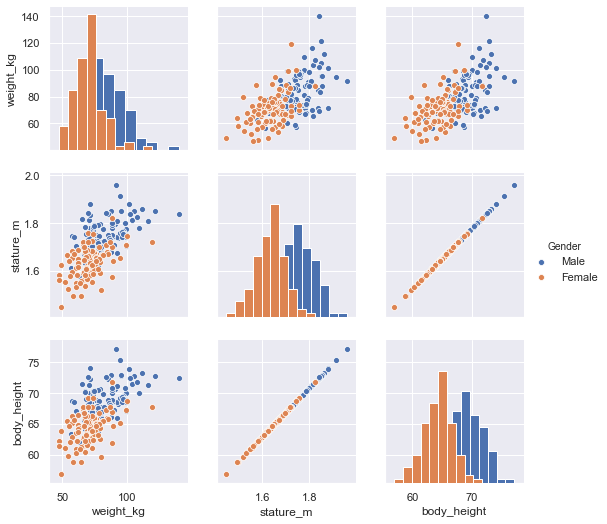

In [31]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

Two features are basically duplicates, remove one of them from the dataset.


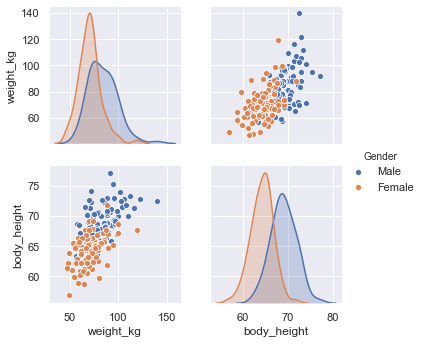

In [32]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop('stature_m', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

Now create a pairplot of the ansur_df_2 data sample and color the points using the 'Gender' feature.

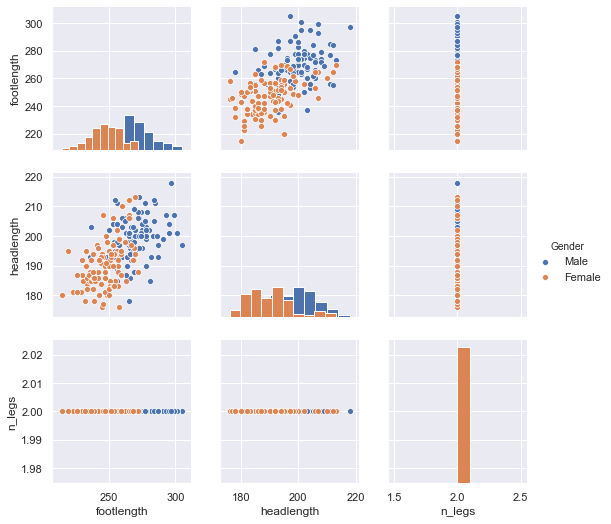

In [33]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')


# Show the plot
plt.show()

One feature has no variance, remove it from the dataset.


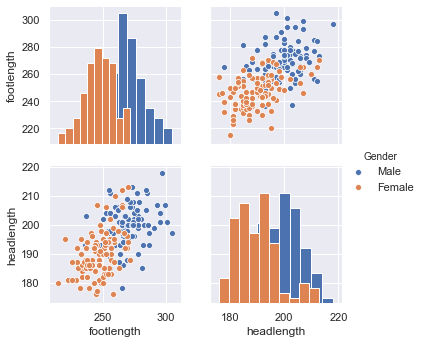

In [34]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

# t-SNE visualization of high-dimensional data


## Fitting t-SNE to the ANSUR data
t-SNE is a great technique for visual exploration of high dimensional datasets. In this exercise, you'll apply it to the ANSUR dataset. You'll remove non-numeric columns from the pre-loaded dataset df and fit TSNE to his numeric dataset.

### init: 1 dataframe, TSNE

In [35]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(df)
tobedownloaded="{pandas.core.frame.DataFrame: {'df.csv': 'https://file.io/YVaYCS'}}"
prefix='data_from_datacamp/Chap131_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"df.csv": "https://file.io/YVaYCS"}}
{'pandas.core.frame.DataFrame': {'df.csv': 'https://file.io/YVaYCS'}}


D:\git\data-scientist-skills\python-sandbox\dimensionality-reduction-in-python\uploadfromdatacamp.py:92: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dict_urls=yaml.load(dict_urls)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 2460k    0 2460k    0     0   810k      0 --:--:--  0:00:03 --:--:--  810k


In [36]:
import pandas as pd
df=pd.read_csv(prefix+'df.csv',index_col=0)

In [38]:
from sklearn.manifold import TSNE

### code

- Drop the non-numeric columns from the dataset.
- Create a TSNE model with learning rate 50.
- Fit and transform the model on the numeric dataset.

In [39]:
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


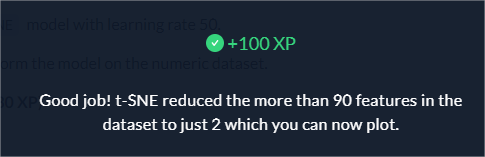

## t-SNE visualisation of dimensionality
Time to look at the results of your hard work. In this exercise, you will visualize the output of t-SNE dimensionality reduction on the combined male and female Ansur dataset. You'll create 3 scatterplots of the 2 t-SNE features ('x' and 'y') which were added to the dataset df. In each scatterplot you'll color the points according to a different categorical variable.

seaborn has already been imported as sns and matplotlib.pyplot as plt.

### init: 1 dataframe, sns, plt

In [40]:
from uploadfromdatacamp import saveFromFileIO

#uploadToFileIO(df)
tobedownloaded="{pandas.core.frame.DataFrame: {'df.csv': 'https://file.io/CTM4tq'}}"
prefix='data_from_datacamp/Chap132_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

{pandas.core.frame.DataFrame: {"df.csv": "https://file.io/CTM4tq"}}
{'pandas.core.frame.DataFrame': {'df.csv': 'https://file.io/CTM4tq'}}


D:\git\data-scientist-skills\python-sandbox\dimensionality-reduction-in-python\uploadfromdatacamp.py:92: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dict_urls=yaml.load(dict_urls)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  870k    0  870k    0     0   459k      0 --:--:--  0:00:01 --:--:--  459k


In [43]:
import pandas as pd
df=pd.read_csv(prefix+'df.csv',index_col=0)

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### code

- Use seaborn's sns.scatterplot to create the plot.
- Color the points by 'Component'.

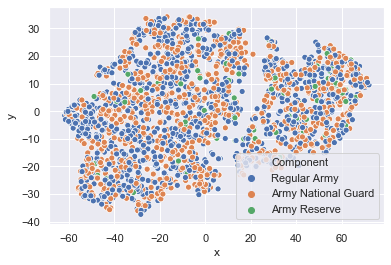

In [44]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

- Color the points of the scatterplot by 'Branch'.

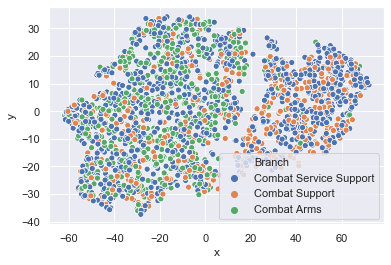

In [45]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

- Color the points of the scatterplot by 'Gender'

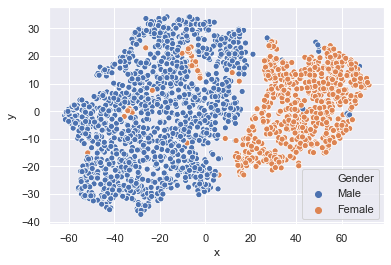

In [46]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()

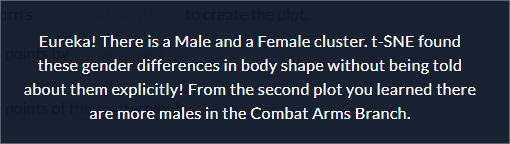